# STAT220 Lab 1

### Import Data

In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Download the dataset
!wget https://richardson.byu.edu/220/ds_salary.csv

--2024-09-16 21:06:19--  https://richardson.byu.edu/220/ds_salary.csv
Resolving richardson.byu.edu (richardson.byu.edu)... 128.187.111.44
Connecting to richardson.byu.edu (richardson.byu.edu)|128.187.111.44|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 35370 (35K) [text/csv]
Saving to: ‘ds_salary.csv’

ds_salary.csv       100%[===================>]  34.54K  --.-KB/s    in 0.06s   

2024-09-16 21:06:20 (602 KB/s) - ‘ds_salary.csv’ saved [35370/35370]



In [ ]:
# Read the CSV file into a pandas DataFrame and drop index column
df = pd.read_csv('ds_salary.csv')
df = df.drop(columns=['...1'])

In [ ]:
# Replace experience level abbreviations with full descriptions for clarity
df['experience_level'].replace({'SE': 'Senior', 'MI': 'Mid', 'EN': 'Entry', 'EX': 'Executive'}, inplace=True)

### 0. Data Exploration

In [ ]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,2020,Senior,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2020,Senior,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,2020,Mid,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,2020,Senior,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


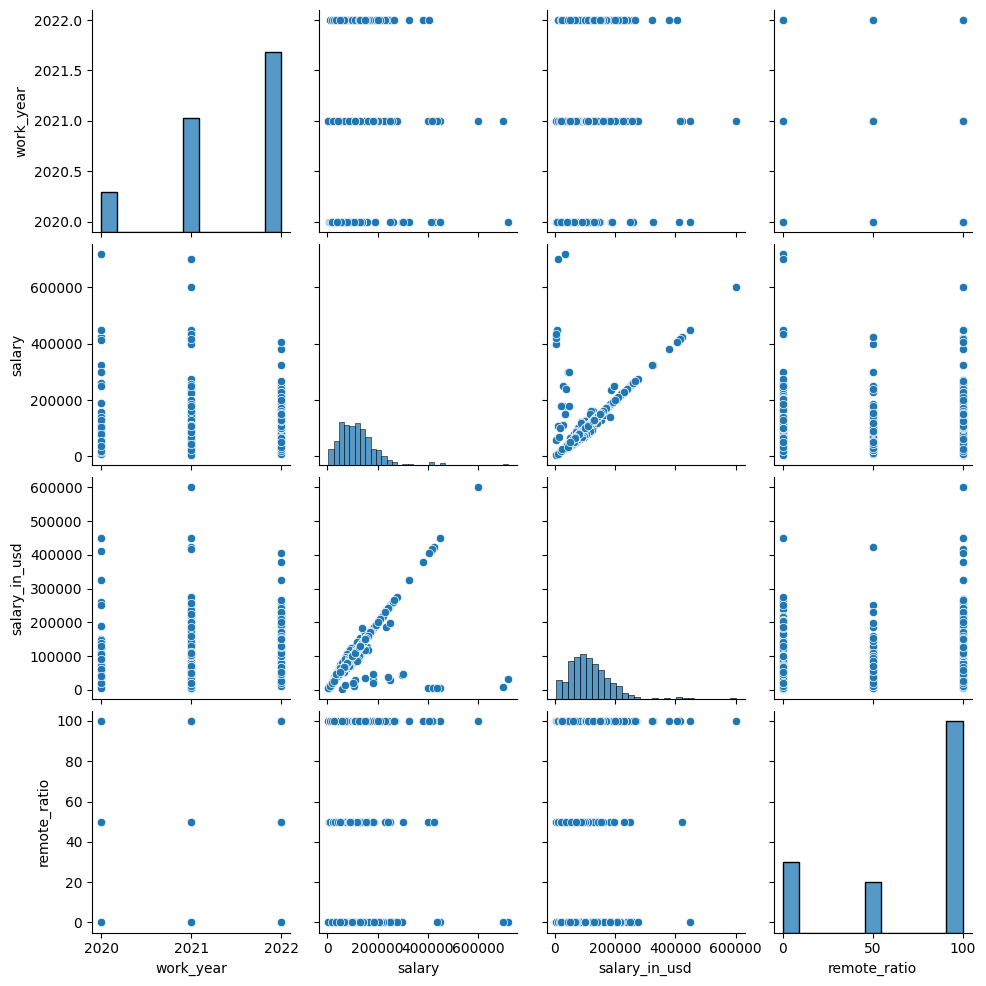

In [ ]:
# Create a pairplot to visualize relationships between numerical variables
sns.pairplot(df)

### 1. General Salary Data

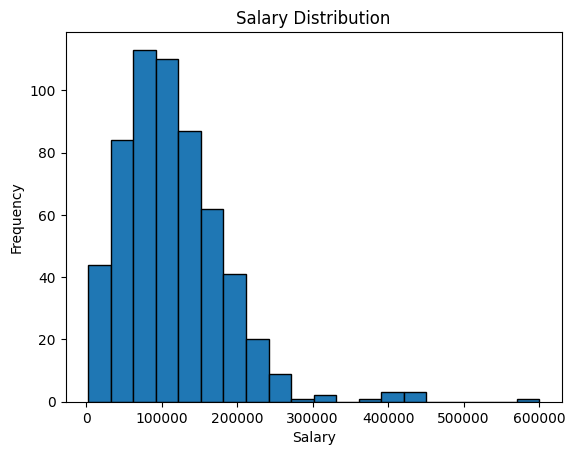

In [ ]:
# Create a histogram of salaries
plt.hist(df['salary_in_usd'], bins=20, edgecolor='black')
plt.title('Salary Distribution')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

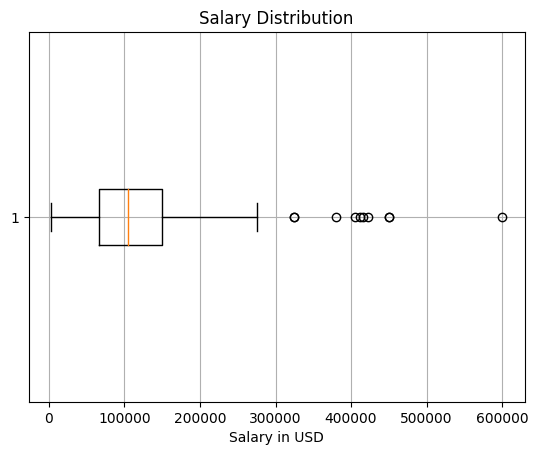

In [ ]:
# Create a boxplot of salaries
plt.boxplot(df['salary_in_usd'], vert=False)
plt.grid(True)
plt.title('Salary Distribution')
plt.xlabel('Salary in USD')
plt.ylabel('')
plt.show()

In [ ]:
# Display summary statistics of the salary data
df['salary_in_usd'].describe()

,salary_in_usd
count,581.000000
mean,115601.769363
std,70607.253360
min,2859.000000
25%,66022.000000
50%,105000.000000
75%,150260.000000
max,600000.000000


**Summary**:

We created a histogram of the salary in USD to standardize the value. The data appears to be right skewed. This is shown in the variance of the mean and median with the mean being about \$10,000 larger than the median. Anything above \$300,000 USD is an outlier.

### 2. Effect of Experience on Salary


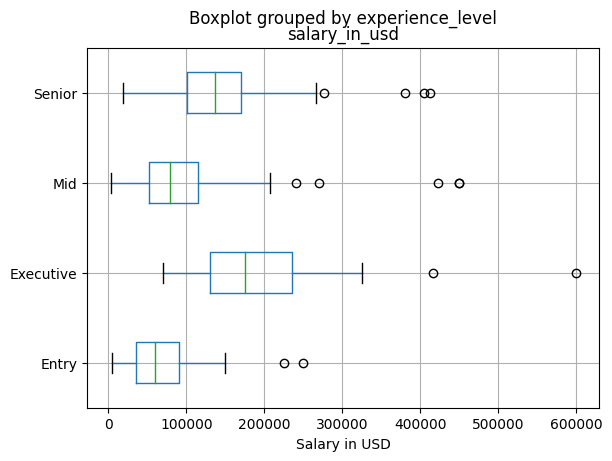

In [ ]:
# Create boxplots to show salary distribution by experience level
df.boxplot(column = 'salary_in_usd', by='experience_level', vert = False, grid=True)
plt.xlabel('Salary in USD')
plt.ylabel('')
plt.show()

**Summary**:

There is an expected increase of median pay between entry, mid, senior, and executive employees. We see the greatest varience of pay among the executives.

### 3. Impact of Company Size

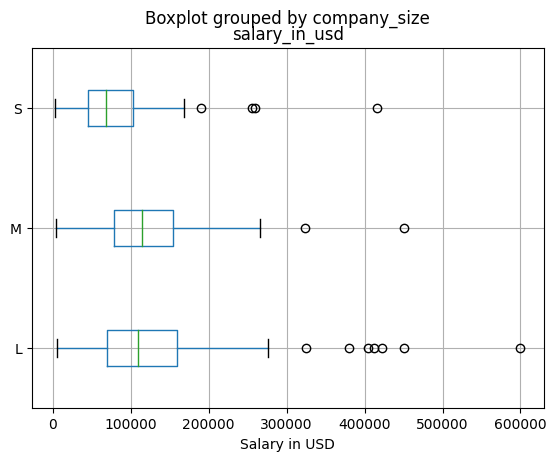

In [ ]:
# Create boxplots to show salary distribution by company size
df.boxplot(column = 'salary_in_usd', by='company_size', vert = False, grid=True)
plt.xlabel('Salary in USD')
plt.ylabel('')
plt.show()

In [ ]:
# Display summary statistics of salary by company size
df.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,182.0,126090.016484,86348.230843,5882.0,69999.25,109500.0,160000.0,600000.0
M,321.0,118350.323988,58590.477351,4000.0,78526.00,115000.0,154000.0,450000.0
S,78.0,79817.833333,64581.554758,2859.0,45653.50,67881.5,102370.0,416000.0


**Summary**:

We see a pattern that large companies seem to have more outliers than small or medium companies. Small companies have lower median pay and a more restrictive range of salaries, although they also have a lower sample size. The max salary between small and medium seem to be roughly balanced.

### 4. Job Title Analysis

In [ ]:
# Display the count of each job title in the dataset
df['job_title'].value_counts()

,count
job_title,
Data Scientist,134
Data Engineer,129
Data Analyst,97
Machine Learning Engineer,39
Research Scientist,16
Data Architect,11
Data Science Manager,10
Machine Learning Scientist,8
Data Analytics Manager,7


In [ ]:
# Create subsets of the data for scientists and other roles
df_scientist = df[df['job_title'].str.contains('Scientist')]
df_other = df[~df['job_title'].str.contains('Scientist')]

<BarContainer object of 398 artists>

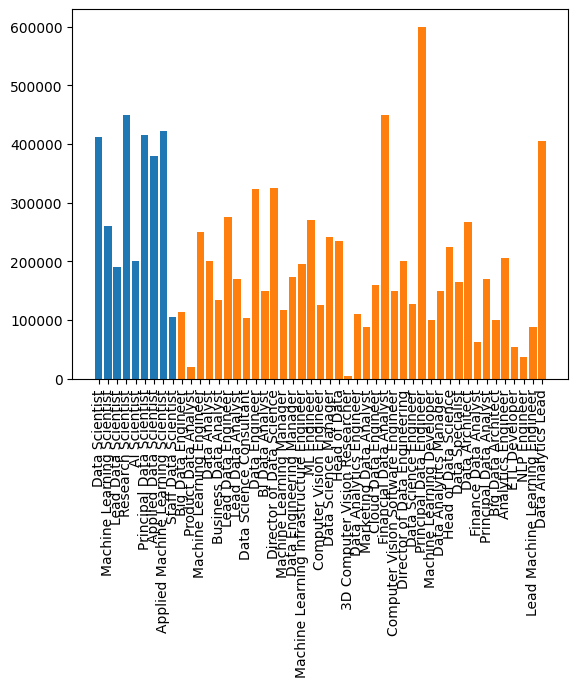

In [ ]:
# Create a bar plot comparing salaries of scientists and other roles
plt.bar(df_scientist['job_title'], df_scientist['salary_in_usd'], label='Scientist')
plt.xticks(rotation=90)
plt.bar(df_other['job_title'], df_other['salary_in_usd'], label='Other')

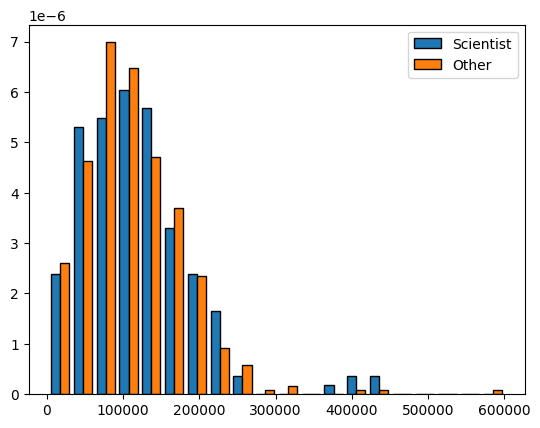

In [ ]:
# Create a histogram comparing salary distributions of scientists and other roles
plt.hist([df_scientist['salary_in_usd'], df_other['salary_in_usd']], bins=20, density=True, edgecolor='black', label=['Scientist', 'Other'])
plt.legend()

In [ ]:
df_scientist['salary_in_usd'].describe()

,salary_in_usd
count,183.000000
mean,120302.961749
std,77087.854132
min,2859.000000
25%,64329.500000
50%,112300.000000
75%,155000.000000
max,450000.000000


In [ ]:
df_other['salary_in_usd'].describe()

,salary_in_usd
count,398.000000
mean,113440.165829
std,67411.232482
min,4000.000000
25%,68360.250000
50%,103080.000000
75%,150000.000000
max,600000.000000


**Summary**:



From the two graphs above and the statistics gathered on the datasets, we can see that those employees with scientist in their name on average are paid slightly more than those without. The scientist distribution is slightly larger. Those in the other category also have a larger range.

### 5. Interactions Between Relationships

In [ ]:
crosstab = pd.crosstab(df['job_title'],df['company_size'],margins=True, values = df['salary_in_usd'], aggfunc='mean')
crosstab

company_size,L,M,S,All
job_title,,,,
3D Computer Vision Researcher,NaN,5409.000000,NaN,5409.000000
AI Scientist,127500.000000,66000.000000,28948.000000,74149.333333
Analytics Engineer,NaN,175000.000000,NaN,175000.000000
Applied Data Scientist,175655.000000,NaN,NaN,175655.000000
Applied Machine Learning Scientist,249000.000000,35137.500000,NaN,142068.750000
BI Data Analyst,150000.000000,99000.000000,32136.000000,82454.400000
Big Data Architect,NaN,99703.000000,NaN,99703.000000
Big Data Engineer,37941.000000,84512.000000,66023.500000,62825.500000
Business Data Analyst,91253.500000,NaN,NaN,91253.500000


In [ ]:
crosstab.isna().sum()

,0
company_size,
L,11
M,15
S,25
All,0


In [ ]:
pd.crosstab(df['job_title'],df['experience_level'],margins=True)

experience_level,Entry,Executive,Mid,Senior,All
job_title,,,,,
3D Computer Vision Researcher,0,0,1,0,1
AI Scientist,3,0,2,1,6
Analytics Engineer,0,2,0,2,4
Applied Data Scientist,1,0,2,2,5
Applied Machine Learning Scientist,1,0,3,0,4
BI Data Analyst,2,1,2,0,5
Big Data Architect,0,0,0,1,1
Big Data Engineer,2,0,2,2,6
Business Data Analyst,2,0,2,0,4


In [ ]:
pd.crosstab(df['company_size'],df['experience_level'],margins=True, normalize='index')

experience_level,Entry,Executive,Mid,Senior
company_size,,,,
L,0.142857,0.054945,0.434066,0.368132
M,0.084112,0.037383,0.299065,0.579439
S,0.346154,0.038462,0.333333,0.282051
All,0.137694,0.043029,0.345955,0.473322


**Summary**:



Small companies seem to have a larger ratio of entry level jobs compared to medium and large companies. Large companies have the most executives compared to other business sizes. For mid companies almost 90% of workers are those with mid to senior level experience. Looking at the job title and experience table, we see that data analyst and data engineers are predominantly mid and senior positions. (College life is rough) There are less entry and executive positions for most titles. There are a few titles that are heavily executive and are labeled with terms like director etc. When comparing the the mean salaries across job titles and company sizes we see that small companies are almost $35,000 below the overall average of all jobs in all companies.

### 6. Conclusion

**Summary**:



There are several observations we have been able to make. As might be expected those with more experience or larger company size tend to be paid more. There is a slight increase in pay for those who have scientist in their job title. This difference may not be significant and could be the result of variance from data collection. Large companies also have more outliers who we believe to be caused by their higher percentage of executives. Large companies have more roles compared to medium and small companies.